![Screenshot 2025-01-22 at 13.47.53.png](<attachment:Screenshot 2025-01-22 at 13.47.53.png>)
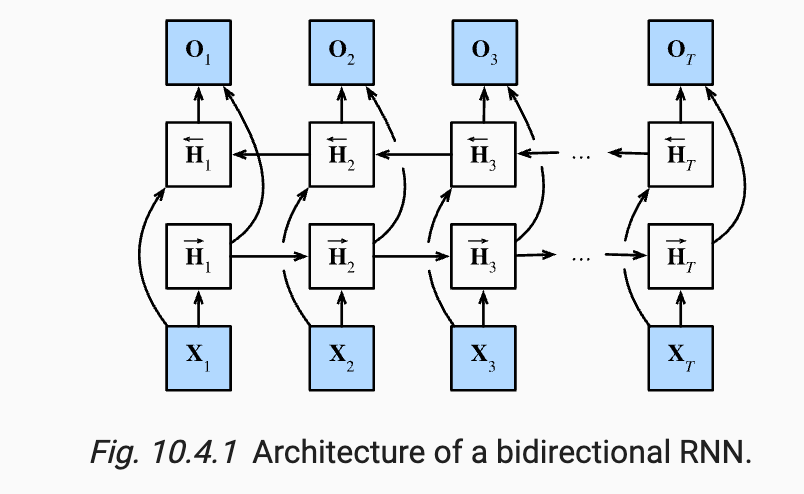

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class BiRNNScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.f_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma)
        self.b_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma)
        self.num_hiddens *= 2  # The output dimension will be doubled

In [3]:
@d2l.add_to_class(BiRNNScratch)
def forward(self, inputs, Hs=None):
    f_H, b_H = Hs if Hs is not None else (None, None)
    f_outputs, f_H = self.f_rnn(inputs, f_H)
    b_outputs, b_H = self.b_rnn(reversed(inputs), b_H)
    outputs = [torch.cat((f, b), -1) for f, b in zip(
        f_outputs, reversed(b_outputs))]
    return outputs, (f_H, b_H)

In [4]:
class BiGRU(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens, bidirectional=True)
        self.num_hiddens *= 2

In [7]:
bi_gru = BiGRU(num_inputs=4, num_hiddens=8)
bi_gru

BiGRU(
  (rnn): GRU(4, 8, bidirectional=True)
)

In [5]:
class BiRNN(d2l.RNN):
    def __init__(self, num_inputs, num_hiddens, num_layers):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens, num_layers=num_layers, bidirectional=True)
        self.num_hiddens *= 2

In [6]:
bi_rnn = BiRNN(num_inputs=4, num_hiddens=8,num_layers=2)
bi_rnn

BiRNN(
  (rnn): RNN(4, 8, num_layers=2, bidirectional=True)
)